## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

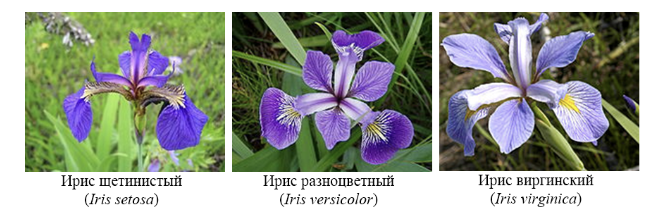

Импортируем необходимые библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [7]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [8]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [9]:
iris_df = pd.DataFrame(iris.data)

In [10]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
iris_df.shape

(150, 6)

In [13]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   name               150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

In [17]:
iris_df.hist(figsize = (15,10), bins = 50);

In [18]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

In [19]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='petal width (cm)', ylabel='Density'>

In [20]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [21]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


<Axes: >

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение классификатора

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [26]:
# Другой способ для вычисления метрики
from sklearn.metrics import accuracy_score
basic_accuracy=accuracy_score(y_test, y_pred)
basic_accuracy

0.9333333333333333

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)

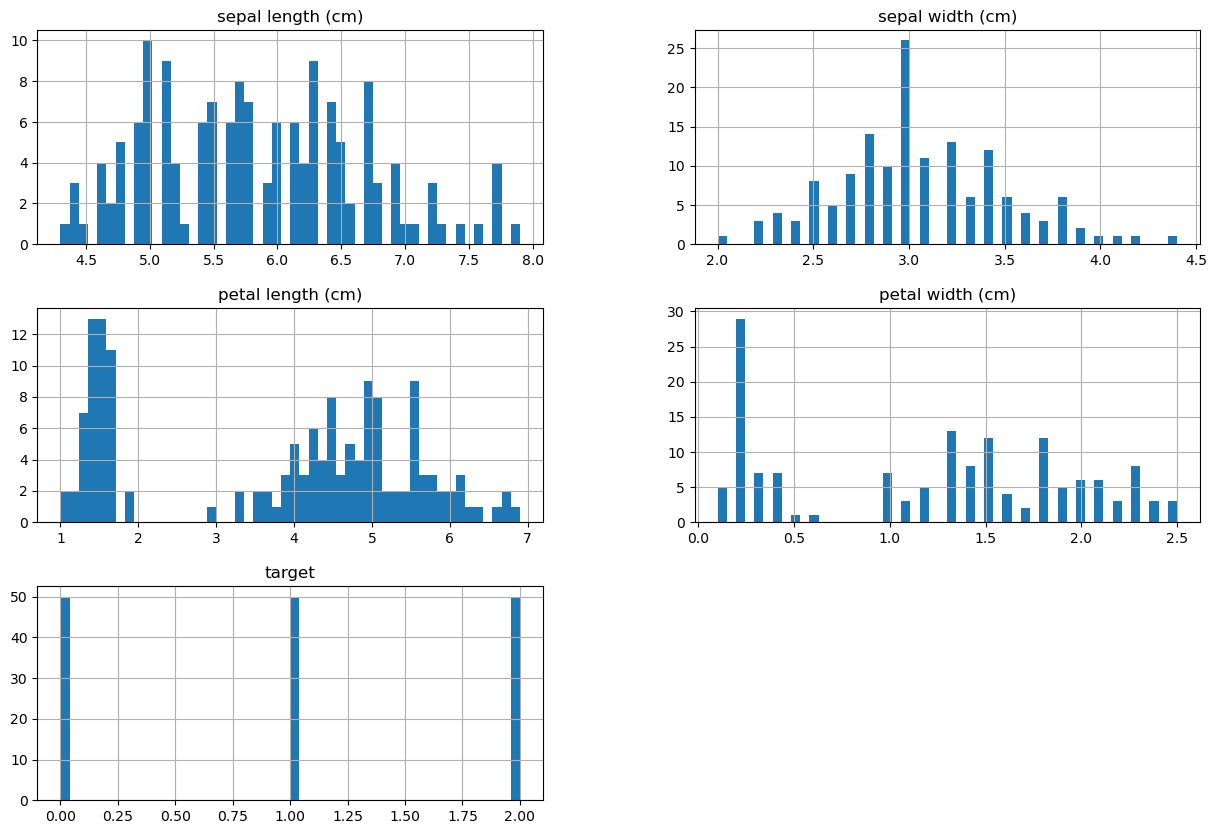

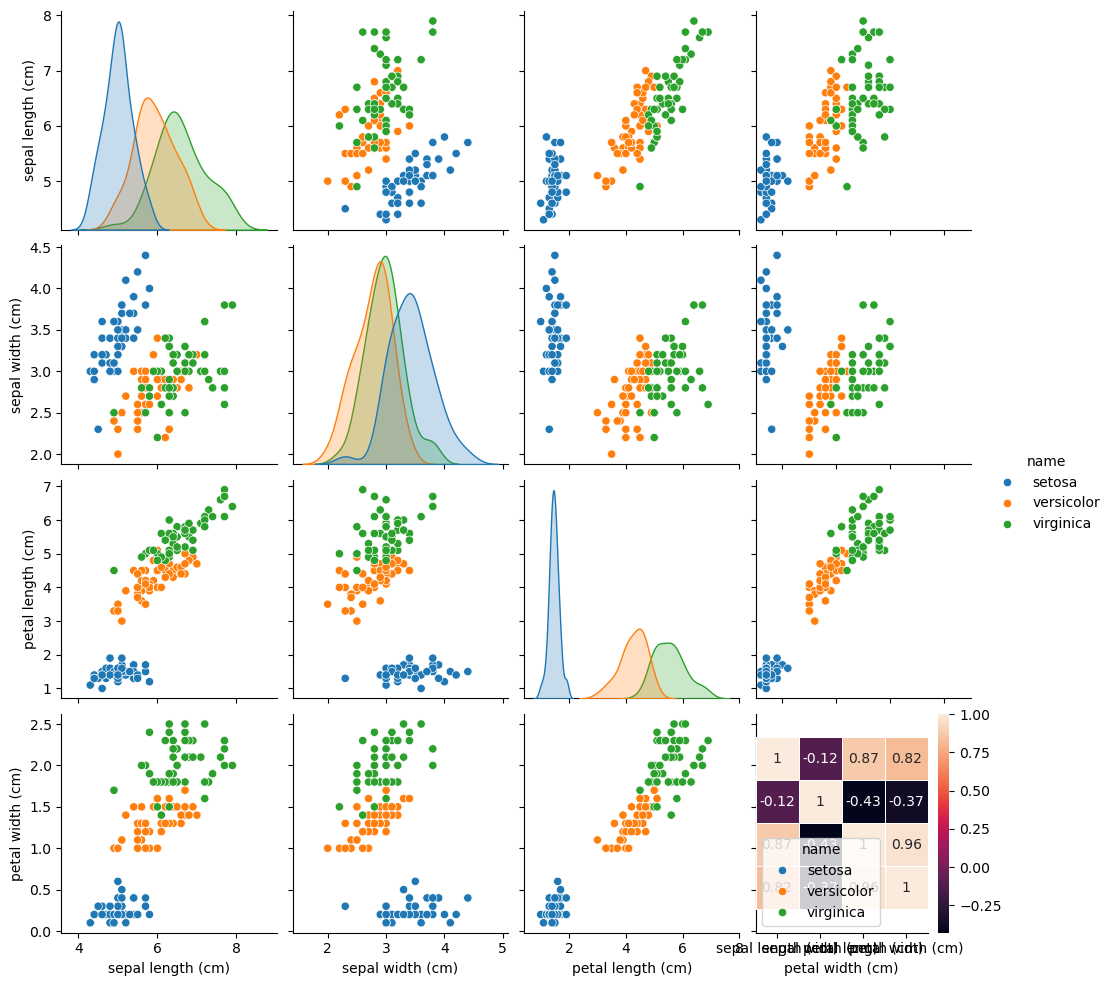

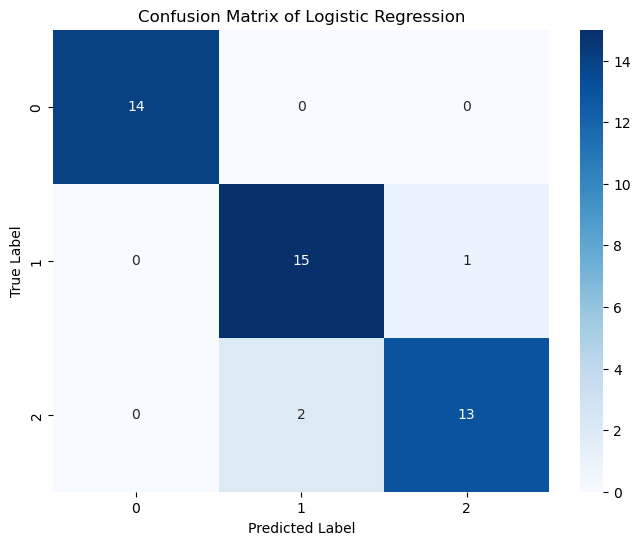

In [30]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

### Метрики многоклассовой классификации

1) Микро-усреднение (micro-averaging) является эквивалентом accuracy и подходит __при сбалансированных классах__. Элементы consufion matrix усредняются между бинарными прогнозами для каждого класса, после чего метрики рассчитываются на полученной матрице. На примере Precision и Recall это выглядит следующим образом:

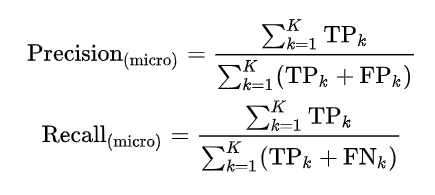

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


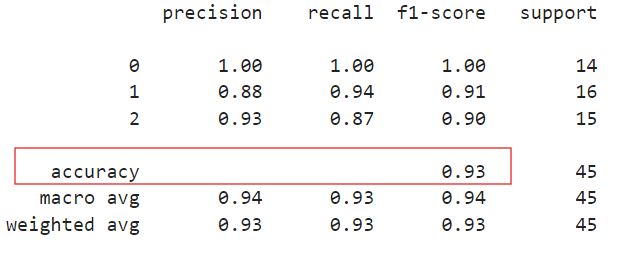

2) Макро-усреднение (macro-averaging) представляет собой среднее арифметическое подсчитанной метрики для каждого класса и используется __при дисбалансе классов, когда важен каждый класс__. В таком случае все классы учитываются равномерно независимо от их размера.

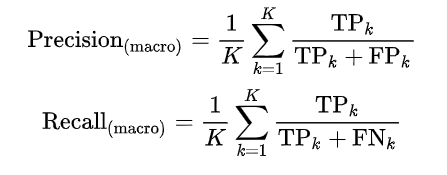

In [33]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9369747899159663
0.9347222222222222
0.9352142110762801


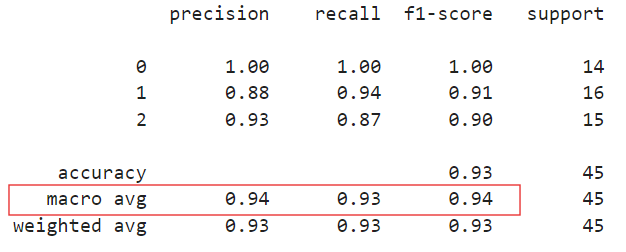

3) Взвешенное усреднение (weighted averaging) рассчитывается как взвешенное среднее и также применяется в случае __дисбаланса классов__, но только когда важность класса учитывается в зависимости от количества объектов с таким классом, то есть __когда важны наибольшие классы__. При таком подходе важность каждого класса учитывается с присвоением им весов. Вес класса w_k может устанавливаться по-разному, например, как доля примеров этого класса в обучающей выборке:

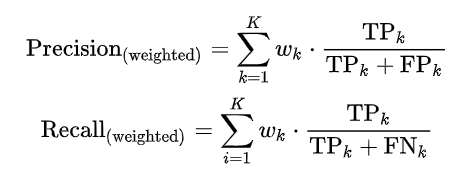

In [34]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9343604108309991
0.9333333333333333
0.9331940090560781


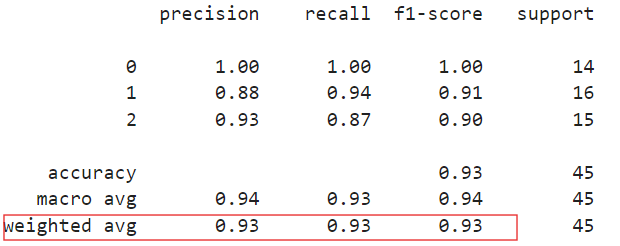

### Кроссвалидация

__Кросс-валидация (перекрестная проверка)__ — это метод оценки производительности модели машинного обучения, который позволяет более эффективно использовать данные для обучения и тестирования. Вместо одного разделения на обучающую и тестовую выборки, мы делаем несколько таких разделений и усредняем результаты.

##### Как работает кросс-валидация

Один из самых распространенных методов — k-блочная кросс-валидация (k-fold cross-validation).

Шаги k-блочной кросс-валидации:
- __Разбиение данных:__ Исходный набор данных случайным образом разбивается на k частей (фолдов) примерно одинакового размера. Обычно k выбирают 5 или 10.

- __Обучение и валидация:__ Модель обучается k раз. Каждый раз:
1. Один из k фолдов используется в качестве тестовой выборки (валидационной).
2. Оставшиеся k-1 фолдов объединяются в обучающую выборку.
3. Модель обучается на обучающей выборке и оценивается на тестовой.
   
- __Сбор метрик:__ После каждого из k запусков вычисляется метрика качества (например, точность). В итоге получаем k значений метрики.

- __Усреднение:__  Вычисляется среднее значение и стандартное отклонение по k метрикам. Это дает итоговую оценку производительности модели.

##### Стратифицированная кросс-валидация
Для задач классификации часто используют стратифицированную кросс-валидацию. Она сохраняет распределение классов в каждом фолде таким же, как и в исходном наборе данных. Это особенно важно, если данные несбалансированы.

In [35]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
                                                    

In [36]:
y = iris_df['target']

In [37]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [38]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score:  0.96


### Настройка гиперпараметров

__GridSearch (сеточный поиск)__ - это метод подбора оптимальных гиперпараметров модели машинного обучения путем полного перебора всех возможных комбинаций.

Как работает GridSearch?

- Задаем сетку гиперпараметров: для каждого гиперпараметра указываем список возможных значений.

- Создаем все возможные комбинации этих гиперпараметров.

- Для каждой комбинации:

1. Обучаем модель на обучающих данных.

2. Оцениваем модель с помощью кросс-валидации.

- Выбираем комбинацию, которая показала наилучший результат.

- Обучаем финальную модель на всем обучающем наборе с лучшими найденными гиперпараметрами.

In [39]:
param_grid = {'n_neighbors': [1,2,3,4,5]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 3}


In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [46]:
# Определяем сетку параметров для KNN
param_grid = {
    'n_neighbors': list(range(1, 31)),           # количество соседей от 1 до 30
    'weights': ['uniform', 'distance'],          # тип весов
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # метрики расстояния
    'p': [1, 2, 3]                               # параметр для метрики Минковского
}

# Создаем GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,                    # 5-фолдовая кросс-валидация
    scoring='accuracy',       # метрика для оптимизации
    n_jobs=-1,               # использовать все ядра
    verbose=1,               # вывод прогресса
    return_train_score=True  # возвращать оценки на обучении
)

# Запускаем поиск
print("Запуск GridSearch...")
grid_search.fit(X_train, y_train)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ GRIDSEARCH")
print("="*50)

Запуск GridSearch...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits

РЕЗУЛЬТАТЫ GRIDSEARCH


In [47]:
print("Лучшие параметры:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"Лучшая точность (CV): {grid_search.best_score_:.4f}")



Лучшие параметры:
  metric: euclidean
  n_neighbors: 8
  p: 1
  weights: distance
Лучшая точность (CV): 0.9905


In [48]:
# Оценка на тестовых данных
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

print(f"Улучшение точности: {test_accuracy - basic_accuracy:.4f}")

Точность на тестовых данных: 0.9778
Улучшение точности: 0.0444


## Случайный лес

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создаём и обучаем модель
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [52]:

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 0.9333333333333333

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



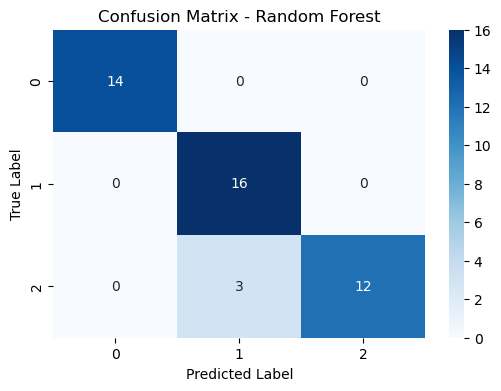

In [53]:

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Определяем сетку параметров для Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Создаем GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Запускаем поиск
print("Запуск GridSearch для Random Forest...")
grid_search_rf.fit(X_train, y_train)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ RANDOM FOREST")
print("="*50)


Запуск GridSearch для Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ RANDOM FOREST


In [64]:

# Выводим лучшие параметры и результаты
print("Лучшие параметры:")
for param, value in grid_search_rf.best_params_.items():
    print(f"  {param}: {value}")
print(f"Лучшая точность (CV): {grid_search_rf.best_score_:.4f}")

Лучшие параметры:
  bootstrap: True
  max_depth: 3
  min_samples_leaf: 4
  min_samples_split: 2
  n_estimators: 100
Лучшая точность (CV): 0.9619


In [65]:

# Оценка на тестовых данных
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Точность на тестовых данных: {test_accuracy_rf:.4f}")
print(f"Улучшение точности: {test_accuracy_rf - basic_accuracy:.4f}")


Точность на тестовых данных: 0.9333
Улучшение точности: 0.0000


## Логическая регрессия

In [54]:
from sklearn.linear_model import LogisticRegression

# Создаём и обучаем модель
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Предсказываем
y_pred_lr = lr.predict(X_test)


In [55]:

# Метрики
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression):", accuracy_lr)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Accuracy (Logistic Regression): 0.9333333333333333

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



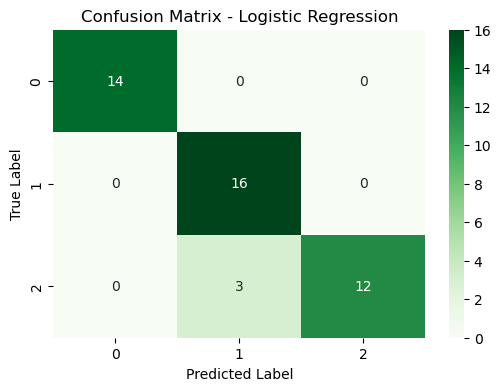

In [56]:

# Матрица ошибок
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [66]:
from sklearn.linear_model import LogisticRegression

# Определяем сетку параметров для Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 500]
}

# Создаем GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Запускаем поиск
print("Запуск GridSearch для Logistic Regression...")
grid_search_lr.fit(X_train, y_train)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ LOGISTIC REGRESSION")
print("="*50)

Запуск GridSearch для Logistic Regression...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ LOGISTIC REGRESSION


In [67]:

# Выводим лучшие параметры и результаты
print("Лучшие параметры:")
for param, value in grid_search_lr.best_params_.items():
    print(f"  {param}: {value}")
print(f"Лучшая точность (CV): {grid_search_lr.best_score_:.4f}")

Лучшие параметры:
  C: 1
  max_iter: 100
  penalty: l1
  solver: saga
Лучшая точность (CV): 0.9810


In [68]:

# Оценка на тестовых данных
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_best_lr)
print(f"Точность на тестовых данных: {test_accuracy_lr:.4f}")
print(f"Улучшение точности: {test_accuracy_lr - basic_accuracy:.4f}")


Точность на тестовых данных: 0.9778
Улучшение точности: 0.0444


## SVM

In [57]:
from sklearn.svm import SVC

# Создаём и обучаем модель
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train, y_train)

# Предсказываем
y_pred_svm = svm.predict(X_test)


In [58]:
# Метрики
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.9333333333333333

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



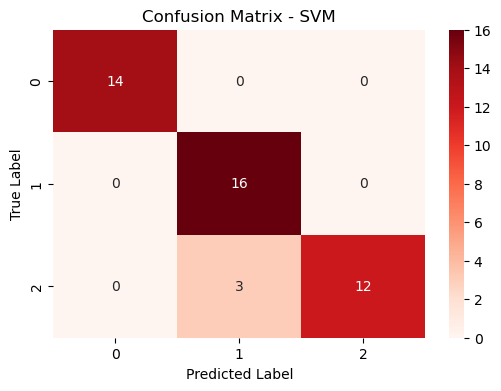

In [59]:

# Матрица ошибок
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Сравнение всех моделей

In [69]:
from sklearn.svm import SVC

# Определяем сетку параметров для SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # актуально только для kernel='poly'
}

# Создаем GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Запускаем поиск
print("Запуск GridSearch для SVM...")
grid_search_svm.fit(X_train, y_train)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ SVM")
print("="*50)

Запуск GridSearch для SVM...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ SVM


In [70]:
# Выводим лучшие параметры и результаты
print("Лучшие параметры:")
for param, value in grid_search_svm.best_params_.items():
    print(f"  {param}: {value}")
print(f"Лучшая точность (CV): {grid_search_svm.best_score_:.4f}")

Лучшие параметры:
  C: 0.1
  degree: 4
  gamma: scale
  kernel: poly
Лучшая точность (CV): 0.9714


In [71]:
# Оценка на тестовых данных
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Точность на тестовых данных: {test_accuracy_svm:.4f}")
print(f"Улучшение точности: {test_accuracy_svm - basic_accuracy:.4f}")


Точность на тестовых данных: 0.9778
Улучшение точности: 0.0444
